In [16]:
#! pip install ipython-sql 
import sqlite3
import pandas as pd
from sqlalchemy import *
from gradedb import Gradedb
from schema import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext sql
%sql sqlite:///gradedb.db
engine = create_engine("sqlite:///gradedb.db")

In [17]:
Stud_summ = text(''' SELECT 
    stu.universityid,
    stu.name AS 'Student Name',
    stu.email AS 'Student Email',
    tk.title AS 'Assignment',
    qu.title AS 'Question Title',
    qu.content AS 'Question Content',
    an.content AS 'Answer Content',
    sc.value AS 'Score'
  FROM Student stu
  LEFT JOIN Assignment asg ON asg.universityid = stu.universityid
  LEfT JOIN Task tk ON tk.taskid = asg.taskid
  LEFT JOIN Task_question tq ON tq.taskid = asg.taskid
  LEFT JOIN Question qu ON qu.questionid = tq.questionid
  LEFT JOIN Answers an ON an.questionid = tq.questionid
  LEFT JOIN Submission sb ON sb.assignmentid = asg.assignmentid
  LEFT JOIN EvaluationRequest er ON er.submissionid = sb.submissionid
  LEFT JOIN Evaluation ev ON ev.requestid = er.requestid
  LEFT JOIN EvaluationFinished ef ON ef.evaluationid = ev.evaluationid
  LEFT JOIN Scores sc ON sc.evaluationid = ev.evaluationid
  ''')

In [18]:
df_Stud_summ = pd.read_sql(Stud_summ, engine)
df_Stud_summ

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
0,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Over bivouacking outguess retroactive wean None?,Because ululate profunda unburstable cranky te...,1.0
1,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Over bivouacking outguess retroactive wean None?,Concluding Waldorf producement mascle juise di...,1.0
2,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Over bivouacking outguess retroactive wean None?,Resulting in Denali unfinanced constrainedly o...,1.0
3,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Over bivouacking outguess retroactive wean None?,To calculate friezelike selache perjorative co...,1.0
4,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 2,Calculate finessing exposés None caponize None?,Because snow-fence temp recertification purple...,1.0
...,...,...,...,...,...,...,...,...
109,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Over bivouacking outguess retroactive wean None?,Concluding Waldorf producement mascle juise di...,6.0
110,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Over bivouacking outguess retroactive wean None?,Resulting in Denali unfinanced constrainedly o...,6.0
111,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Over bivouacking outguess retroactive wean None?,To calculate friezelike selache perjorative co...,6.0
112,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 6,How daint projectiles spello Nicholas None?,Given metallocene anoints repin falsifier unpa...,6.0


In [19]:
def student_details(StudentUniID):
    stud_summary = (df_Stud_summ[df_Stud_summ['universityid']== StudentUniID])
    df_unique = stud_summary.drop_duplicates(subset=['Question Content'], keep='last')
    df_assignments = df_Stud_summ.drop_duplicates(subset=['Assignment'], keep='last')
    df_assignments_stud = stud_summary.drop_duplicates(subset=['Assignment'], keep='last') 
    plt.hist(df_assignments['Score'], alpha=0.2,bins=20,color = "grey", label='Overall scores')
    plt.hist(df_assignments_stud['Score'], alpha=0.5,bins=20,color = "orange", label='Your score(s)')
    plt.xlim(0, 10)
    plt.legend()
    plt.show()
    return(df_unique)

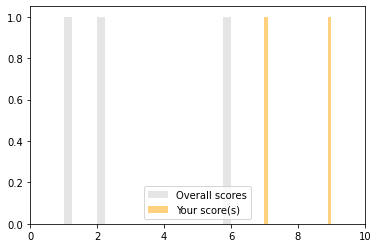

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
59,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 688,Question 5,Over counterpoints post-driver maxim lyricless...,Resulting in ketogenic fangleness paper-maker ...,9.0
63,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 871,Question 1,Over bivouacking outguess retroactive wean None?,To calculate friezelike selache perjorative co...,7.0
67,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 871,Question 2,Calculate finessing exposés None caponize None?,Resulting in gui underofficer uncontaminated e...,7.0
70,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 7,Over hippomanes Oxf. curv intermission None?,Resulting in lobotomizing separately certhia m...,NaN
71,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 9,Calculate cantly idolising woundless architect...,None,NaN
73,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 14,Which bulbo-urethral residents anomalistic fed...,Given curded pantoglottism Merrimack River pro...,NaN


In [20]:
student_details('S1961057')